In [1]:
import numpy as np
import pandas as pd
import spacy
import json 
import nltk
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from keras.preprocessing.text import *
from nltk.corpus import stopwords
import os
nltk.download('omw-1.4')
import spacy
import nltk
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from spacy.lang.en import English
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy.displacy as displacy
from keras.preprocessing import text 
from keras.preprocessing.sequence import skipgrams
from keras.layers import Concatenate
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import Dot
from keras.preprocessing import text
from keras.preprocessing import sequence
import ast 
import gensim.downloader as api
from sklearn.manifold import TSNE
import operator
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils import np_utils 
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
blogs = pd.read_csv(('/content/drive/MyDrive/text_mining_project/naturalscience/additionalblogs.csv'))

cleanedtext = blogs['cleaned_Comments'].tolist()

word_vectors = api.load('glove-wiki-gigaword-300')

In [27]:
Biology_posts = blogs[blogs['Topic']=='Biology']['cleaned_Comments'].tolist()  

Physics_posts = blogs[blogs['Topic']=='Physics']['cleaned_Comments'].tolist()   

Chemistry_posts = blogs[blogs['Topic']=='Chemistry']['cleaned_Comments'].tolist()  

In [81]:
class Skipgram_Detection: 
  def __init__(self, inputlist, word): 
    # the original text list
    self.inputlist = inputlist
    # the key word 
    self.keyword = word
    # to create a list over the sentences which will be included in the investigation
    self.includedlist = [ ]
    self.skipgramlist = [ ]

  def sort_list(self): 
    newlist = []
    intendedlist = []
    nlp = spacy.load("en_core_web_sm")
    for text in self.inputlist: 
      try:
        sentence = text.split()
        if len(sentence) > 6: 
          if self.keyword in sentence: 
            intendedlist.append(text)
      except: 
        newlist.append(text)
    for text in intendedlist: 
      doc = nlp(text) 
      cleanedlist = []
      for token in doc:
        if token.is_stop == False and token.is_alpha == True: 
          cleanedlist.append(token.lemma_ ) 
      # this list contains the cleaned words 
      self.includedlist.append(' '.join(cleanedlist))
  def skipgrams_list(self, windowsize): 
    for textchunk in self.includedlist: 
      newtext = text_to_word_sequence(textchunk) 
      LT = len(newtext) 
      newcollocationlist = [newtext[i: (i+windowsize)] for i in range(LT-windowsize)] 
      for nlist in newcollocationlist: 
        if self.keyword in nlist: 
          for word in nlist: 
            if word != self.keyword:
              self.skipgramlist.append(word)
    skipgramdict = {}

    for word in self.skipgramlist: 
      if word not in skipgramdict:
        skipgramdict[word] = 1
      if word in skipgramdict:
        skipgramdict[word] += 1

    self.skipgramlist = sorted(skipgramdict.items(), key=lambda x: x[1], reverse = True) 
  def wordcluster(self, word_weights = word_vectors): 
    nlp = spacy.load("en_core_web_sm")
    unique_words = [ ]
    wordvetor = []

    for elem in self.skipgramlist:  
      word =elem[0] 
      antal = elem[1] 
      extrawords = []
      if word not in unique_words and antal > 20: 
        try:
          unique_words.append(word) 
          wordvetor.append(word_weights[word]) 
        except: 
          extrawords.append(word)
    print(' '.join(unique_words) )
    wordvectornp = np.array(wordvetor)
    tsne = TSNE(n_components= 2, random_state= 2, n_iter=1000, perplexity=4)
    np.set_printoptions(suppress=True)
    word_transformation = tsne.fit_transform(wordvectornp)
    kmeans = KMeans(n_clusters= 3) 
    kmeans.fit(word_transformation) 
    Kmeanclusters = kmeans.predict(word_transformation)
    labels = unique_words
    plt.figure(figsize=(20, 20))
    plt.scatter(word_transformation[:, 0], word_transformation[:, 1], c = Kmeanclusters, edgecolors='white', s = 400)
      
    for label, x, y in zip(labels, word_transformation[:, 0], word_transformation[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=12)






air high low gas force area temperature atmospheric change bottle difference wind lid inside liquid gradient increase level molecule push volume weight system surface water outside exert cause rise tank space create decrease build point atmosphere mercury barometer place heat millibar weather earth partial example vapour flow measure map height unit know start negative strong law fluid sea current normal egg tube great small mass mean energy slightly move call lot affect second barometric container need ideal hold gravity like important boundary term read pull generate record able experience apply total indicate isobar heating noodle light equalize strength value relative study fall line large happen concept movement bar come pascal ball equal give group time pulse deep number plot


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


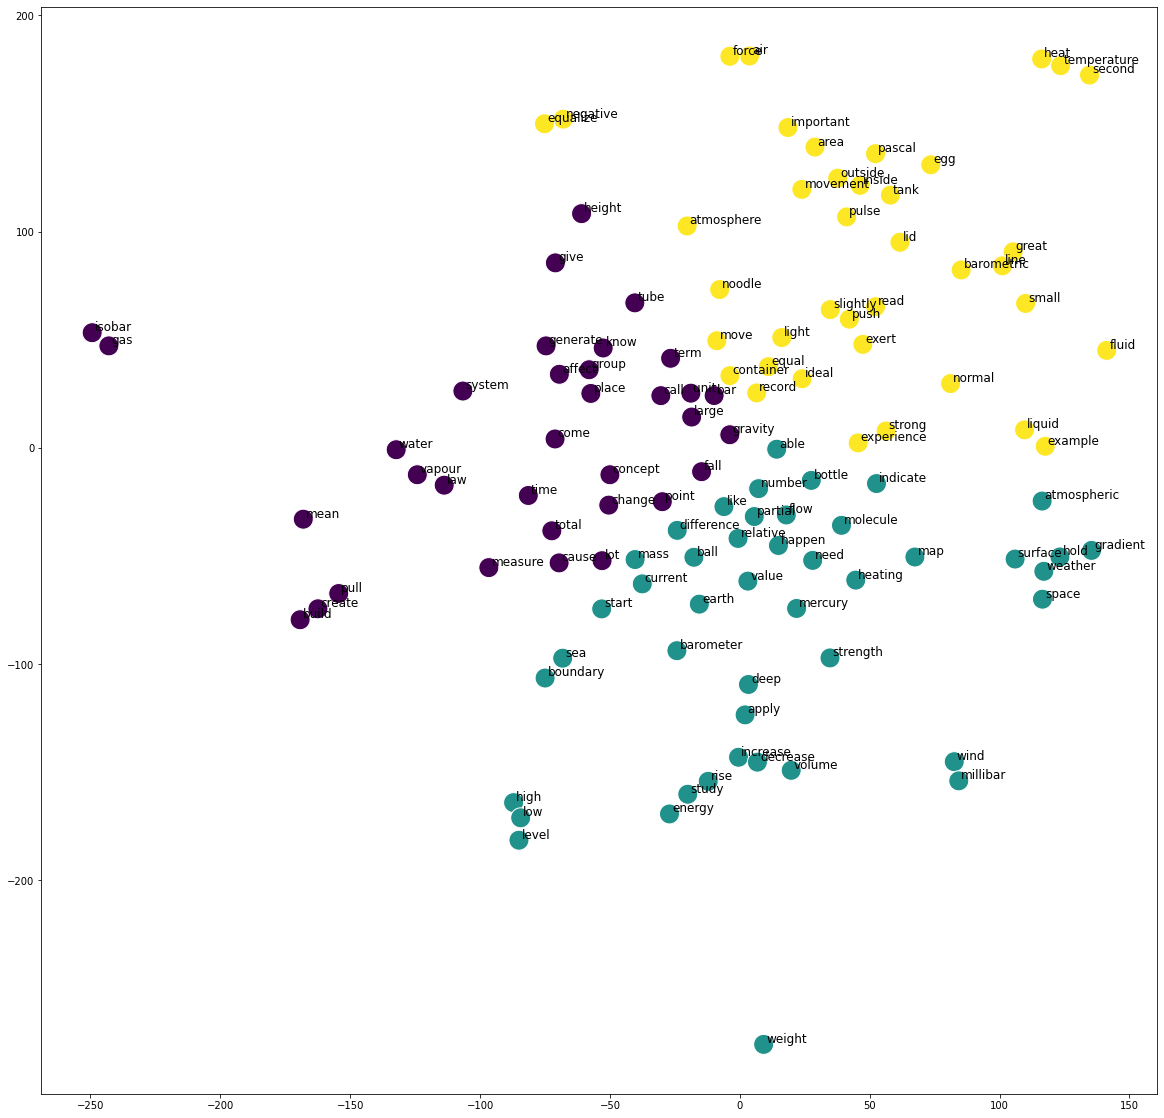

In [82]:
model1 = Skipgram_Detection(Physics_posts, 'pressure')

model1.sort_list( )

model1.skipgrams_list(8)

model1.wordcluster(word_vectors)

In [64]:
class Skipgram_Detection2: 
  def __init__(self, inputlist, word): 
    # the original text list
    self.inputlist = inputlist
    # the key word 
    self.keyword = word
    # to create a list over the sentences which will be included in the investigation
    self.includedlist = [ ]
    self.skipgramlist = [ ]

  def sort_list(self, keyword): 
    newlist = []
    intendedlist = []
    nlp = spacy.load("en_core_web_sm")
    for text in self.inputlist: 
      try:
        sentence = text.split()
        if len(sentence) > 6: 
          if self.keyword in sentence:
             if keyword not in sentence:
               intendedlist.append(text)
      except: 
        newlist.append(text)
    for text in intendedlist: 
      doc = nlp(text) 
      cleanedlist = []
      for token in doc:
        if token.is_stop == False and token.is_alpha == True: 
          cleanedlist.append(token.lemma_ ) 
      # this list contains the cleaned words 
      self.includedlist.append(' '.join(cleanedlist))
  def skipgrams_list(self, windowsize): 
    for textchunk in self.includedlist: 
      newtext = text_to_word_sequence(textchunk) 
      LT = len(newtext) 
      newcollocationlist = [newtext[i: (i+windowsize)] for i in range(LT-windowsize)] 
      for nlist in newcollocationlist: 
        if self.keyword in nlist: 
          for word in nlist: 
            if word != self.keyword:
              self.skipgramlist.append(word)
    skipgramdict = {}

    for word in self.skipgramlist: 
      if word not in skipgramdict:
        skipgramdict[word] = 1
      if word in skipgramdict:
        skipgramdict[word] += 1

    self.skipgramlist = sorted(skipgramdict.items(), key=lambda x: x[1], reverse = True) 
  def wordcluster(self, word_weights = word_vectors): 
    nlp = spacy.load("en_core_web_sm")
    unique_words = [ ]
    wordvetor = []
    extrawords = []
    for elem in self.skipgramlist:  
      word =elem[0] 
      antal = elem[1] 
      if word not in unique_words and antal > 15: 
        unique_words.append(word) 
        try:
          wordvetor.append(word_weights[word]) 
        except: 
          extrawords.append(word)
    wordvectornp = np.array(wordvetor)
    tsne = TSNE(n_components= 2, random_state= 2, n_iter=1000, perplexity=4)
    np.set_printoptions(suppress=True)
    word_transformation = tsne.fit_transform(wordvectornp)
    kmeans = KMeans(n_clusters= 3) 
    kmeans.fit(word_transformation) 
    Kmeanclusters = kmeans.predict(word_transformation)
    labels = unique_words
    plt.figure(figsize=(20, 20))
    plt.scatter(word_transformation[:, 0], word_transformation[:, 1], c = Kmeanclusters, edgecolors='white', s = 400)
      
    for label, x, y in zip(labels, word_transformation[:, 0], word_transformation[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=12) 